https://www.jianshu.com/p/738f6092ef53

# 一元线性回归

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname = r"c:\windows\fonts\msyh.ttc",size = 10)

In [3]:
def runplt():
    plt.figure()
    plt.title('披萨价格与直径数据',fontproperties=font)
    plt.xlabel('直径（英寸）',fontproperties=font)
    plt.ylabel('价格（美元）',fontproperties=font)
    plt.axis([0,25,0,25])
    plt.grid(True)
    return plt

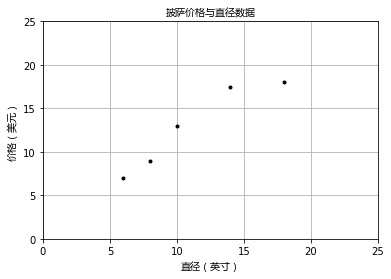

In [4]:
plt = runplt()
X = [[6],[8],[10],[14],[18]]
y = [[7],[9],[13],[17.5],[18]]
plt.plot(X,y,'k.')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()
model.fit(X,y)
model.predict([12][0])

array([[13.68103448]])

In [7]:
print ('Price of 12 inch pizza: %.2f' % model.predict([12][0]))

Price of 12 inch pizza: 13.68


LinearRegression 类是一个估计器（estimator）。 

估计器依据观测值来预测结果。 

在 scikit-learn 里面，所有的估计器都带有 fit() 和 predict() 方法。 

fit() 用来分析模型参数，predict() 是通过 fit() 算出的模型参数构成的模型，对解释变量进行预测获得的值。


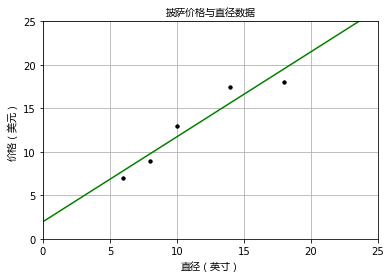

In [8]:
plt = runplt()
plt.plot(X,y,'k.')
X2 = [[0],[10],[14],[25]]
model = LinearRegression()
model.fit(X,y)
y2 = model.predict(X2)
plt.plot(X,y,'k.')
plt.plot(X2,y2,'g-')
plt.show()

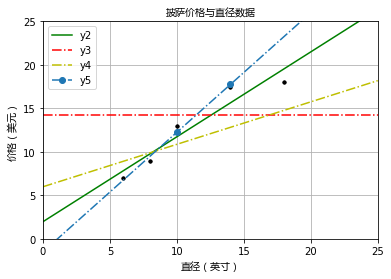

In [9]:
plt = runplt()
plt.plot(X,y,'k.')
y3 = [14.25,14.25,14.25,14.25]
y4 = y2 * 0.5 +5
model.fit(X[1:-1],y[1:-1])
y5 = model.predict(X2)
plt.plot(X,y,'k.')
l1, = plt.plot(X2,y2,'g-')
l2, = plt.plot(X2,y3,'r-.')
l3, = plt.plot(X2,y4,'y-.')
l4, = plt.plot(X2,y5,'o-.')
plt.legend(handles = [l1,l2,l3,l4,], labels = ['y2','y3','y4','y5'], loc = 'best') 
plt.show()

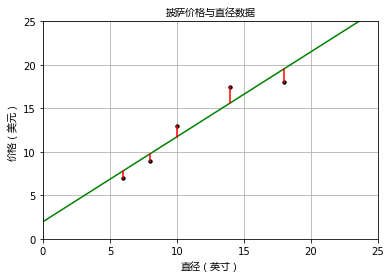

In [10]:
plt = runplt()
plt.plot(X,y,'k.')
X2 = [[0],[10],[14],[25]]
model = LinearRegression()
model.fit(X,y)
y2 = model.predict(X2)
plt.plot(X,y,'k.')
plt.plot(X2,y2,'g-')

yr = model.predict(X)
for idx,x in enumerate(X):
    plt.plot([x,x],[y[idx],yr[idx]],'r-')

plt.show()

## 残差平方和（residual sum of squares）SSE

In [11]:
import numpy as np
np.mean((model.predict(X) - y) ** 2)

1.7495689655172406

### 解一元线性回归的最小二乘法

### 方差:用来衡量样本分散程度

In [13]:
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 
            + (14 - xbar)**2 + (18 - xbar)**2)/4
print (variance)

23.2


In [14]:
print(np.var([6,8,10,14,18],ddof=1))

23.2


ddof 参数是贝塞尔 (无偏估计) 校正系数（Bessel'scorrection），设置为 1，可得样本方差无偏估计量

### 协方差:表示两个变量的总体的变化趋势

现在有了方差和协方差，就可以计算相关系统贝塔了

算出贝塔后，就可以计算阿尔法了

## 模型评估

LinearRegression 的 score 方法可以计算 R 方：

In [16]:
X_test = [[8],[9],[11],[16],[12]]
y_test = [[11],[8.5],[15],[18],[11]]
model = LinearRegression()
model.fit(X,y)
model.score(X_test,y_test)

0.6620052929422553

-------------------------------------

# 多元线性回归

In [17]:
from numpy.linalg import inv
from numpy import dot,transpose

In [19]:
X = [[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y = [[7],[9],[13],[17.5],[18]]
print(dot(inv(dot(transpose(X),X)),dot(transpose(X),y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [27]:
from numpy.linalg import inv
from numpy import dot,transpose
X = [[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y = [[7],[9],[13],[17.5],[18]]
print(dot(inv(dot(transpose(X),X)),dot(transpose(X),y)))
print('******************************')
X = [[6,2],[8,1],[10,0],[14,2],[18,0]]
y = [[7],[9],[13],[17.5],[18]]
model = LinearRegression()
model.fit(X,y)
X_test = [[8,2],[9,0],[11,2],[16,2],[12,0]]
y_test = [[11],[8.5],[15],[18],[11]]
predictions = model.predict(X_test)
for i,predictions in enumerate(predictions):
    print(predictions,y_test[i])    
    print(model.score(X_test,y_test))
    print('--------------------------')

[[1.1875    ]
 [1.01041667]
 [0.39583333]]
******************************
[10.0625] [11]
0.7701677731318468
--------------------------
[10.28125] [8.5]
0.7701677731318468
--------------------------
[13.09375] [15]
0.7701677731318468
--------------------------
[18.14583333] [18]
0.7701677731318468
--------------------------
[13.3125] [11]
0.7701677731318468
--------------------------
